In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

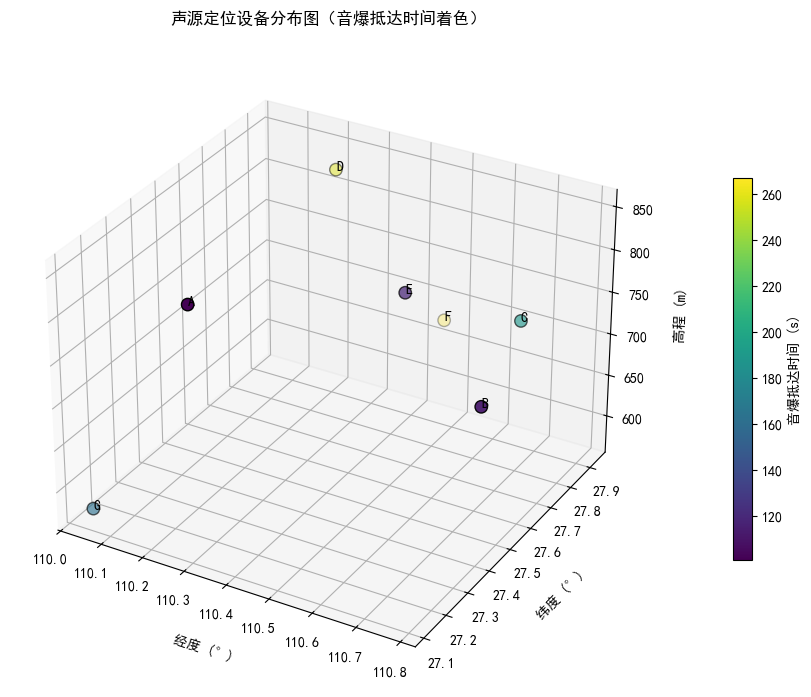

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

# 设置字体以支持中文显示
rcParams['font.family'] = 'SimHei'  # 黑体
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 数据定义
data = {
    '设备': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    '经度': [110.241, 110.780, 110.712, 110.251, 110.524, 110.467, 110.047],
    '纬度': [27.204, 27.456, 27.785, 27.825, 27.617, 27.921, 27.121],
    '高程': [824, 727, 742, 850, 786, 678, 575],
    '时间': [100.767, 112.220, 188.020, 258.985, 118.443, 266.871, 163.024],
}

df = pd.DataFrame(data)

# 创建图形
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(df['经度'], df['纬度'], df['高程'],
                c=df['时间'], cmap='viridis', s=80, edgecolors='k', depthshade=True)

# 添加设备标签
for i in range(len(df)):
    ax.text(df['经度'][i], df['纬度'][i], df['高程'][i],
            df['设备'][i], size=10, color='black')

# 设置轴标签和标题
ax.set_xlabel('经度 (°)', labelpad=10)
ax.set_ylabel('纬度 (°)', labelpad=10)
ax.set_zlabel('高程 (m)', labelpad=10)
ax.set_title('声源定位设备分布图（音爆抵达时间着色）', pad=20)

# 添加颜色条表示音爆时间
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('音爆抵达时间 (s)')

plt.tight_layout()
plt.show()


 步骤 1：基础设置与数据预处理
📌目标：
将设备数据转为numpy数组

转换为笛卡尔坐标便于三维可视化

初始绘图

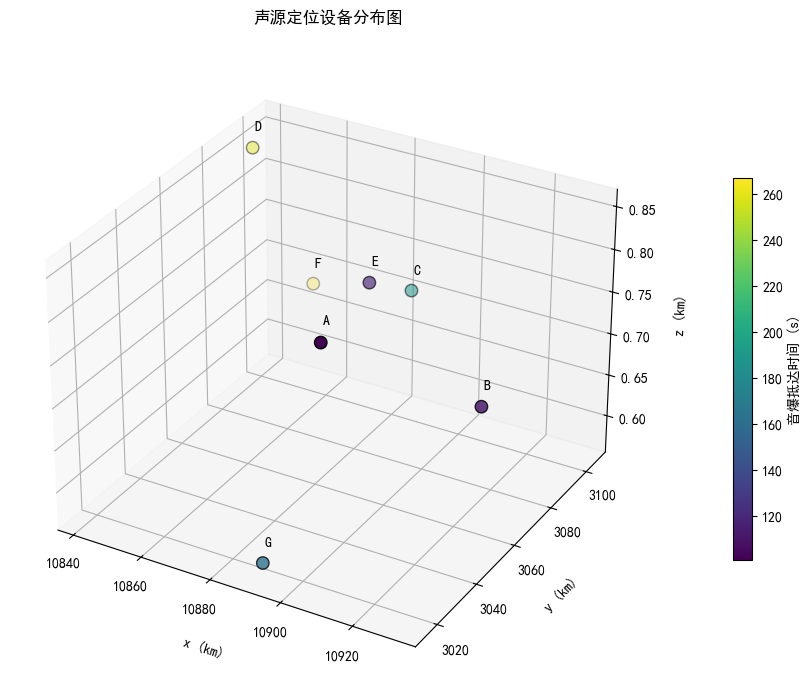

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
import numpy as np

# 设置字体以支持中文显示
rcParams['font.family'] = 'SimHei'  # 黑体
rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 数据定义
data = {
    '设备': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    '经度': [110.241, 110.780, 110.712, 110.251, 110.524, 110.467, 110.047],
    '纬度': [27.204, 27.456, 27.785, 27.825, 27.617, 27.921, 27.121],
    '高度': [824, 727, 742, 850, 786, 678, 575],
    '时间': [100.767, 112.220, 188.020, 258.985, 118.443, 266.871, 163.024],
}
df = pd.DataFrame(data)

# 将经纬度（度）转换为近似平面坐标（单位: km），考虑地球半径R=6371 km
R = 6371
df['x'] = R * np.cos(np.radians(df['纬度'])) * np.radians(df['经度'])
df['y'] = R * np.radians(df['纬度'])
df['z'] = df['高度'] / 1000  # 高度单位转换为 km

# 创建图形
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D散点图
sc = ax.scatter(df['x'], df['y'], df['z'],
                c=df['时间'], cmap='viridis', s=80, edgecolors='k', depthshade=True)

# 添加设备标签（显示在点的右上方）
for i in range(len(df)):
    ax.text(df['x'][i] + 0.3,
            df['y'][i] + 0.3,
            df['z'][i] + 0.02,  # 20 米高度偏移
            df['设备'][i],
            size=10, color='black')

# 设置轴标签和标题（z轴单位改为 km）
ax.set_xlabel('x (km)', labelpad=10)
ax.set_ylabel('y (km)', labelpad=10)
ax.set_zlabel('z (km)', labelpad=10)
ax.set_title('声源定位设备分布图', pad=20)

# 添加颜色条
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('音爆抵达时间 (s)')

plt.tight_layout()
plt.show()


步骤 2：组合分析并估算声源位置
我们对四点组合C(7,4)=35，对每组点估算“音爆源位置”。简单用“时间差最小回归点”方式近似（精确反演涉及波动方程，这里做模拟）。

In [18]:
from itertools import combinations

# 所有4点组合
indices = list(combinations(range(7), 4))
result_points = []

# 使用每组4个点，估算最小时间差中心点
for idx_group in indices:
    subset = df.loc[list(idx_group)]
    # 简化假设：以时间加权平均计算声源估计点
    weights = 1 / subset['时间']
    weights /= weights.sum()
    x_est = np.sum(subset['x'] * weights)
    y_est = np.sum(subset['y'] * weights)
    z_est = np.sum(subset['z'] * weights)
    result_points.append((x_est, y_est, z_est))

result_points = np.array(result_points)



步骤 3：绘制红色计算点 + 保存坐标（还原为经纬度）

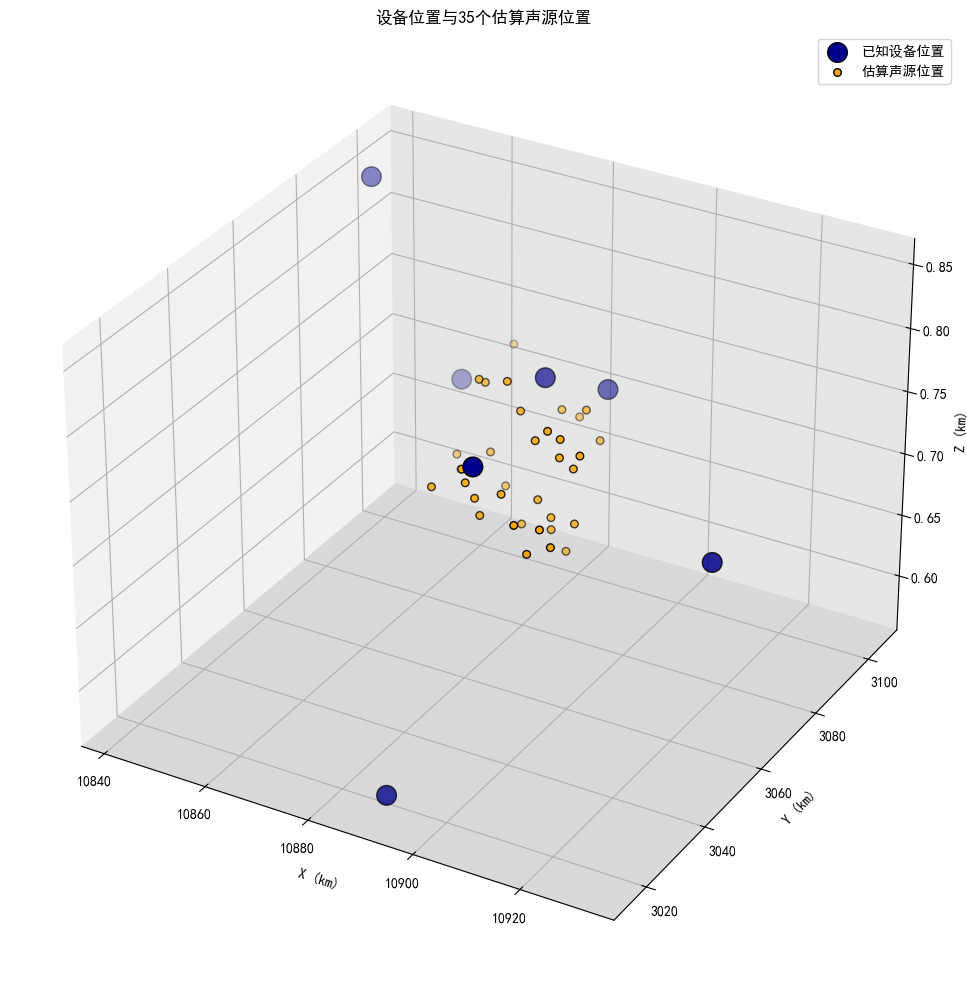

In [35]:
# 添加到图中
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 设置立体灰白背景
ax.xaxis.set_pane_color((0.95, 0.95, 0.95, 1.0))
ax.yaxis.set_pane_color((0.9, 0.9, 0.9, 1.0))
ax.zaxis.set_pane_color((0.85, 0.85, 0.85, 1.0))

# 已知设备点，统一颜色为深蓝色
ax.scatter(df['x'], df['y'], df['z'], c='darkblue', s=200, label='已知设备位置', edgecolors='k')

# 计算出的35个点，统一颜色为橘黄色
ax.scatter(result_points[:, 0], result_points[:, 1], result_points[:, 2], c='orange', s=30, label='估算声源位置', edgecolors='k')

# 设置轴标签和标题
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
ax.set_title('设备位置与35个估算声源位置')
ax.legend()

plt.tight_layout()
plt.show()

In [20]:
lon = result_points[:, 0]
lat = result_points[:, 1]
alt = result_points[:, 2]

result_df = pd.DataFrame({
    '估算经度': lon,
    '估算纬度': lat,
    '估算高度(m)': alt
})


print(result_df)


            估算经度         估算纬度   估算高度(m)
0   10900.909179  3055.642275  0.781162
1   10904.943079  3055.042973  0.774261
2   10902.711007  3056.919058  0.757780
3   10906.465372  3042.666537  0.730632
4   10899.466066  3053.979467  0.789162
5   10896.138382  3055.770093  0.774420
6   10900.626695  3040.892240  0.744522
7   10901.081138  3055.121559  0.768165
8   10904.600876  3042.330183  0.742814
9   10902.376232  3042.074158  0.721659
10  10887.767255  3061.174715  0.800165
11  10881.512352  3064.725448  0.785366
12  10888.022858  3046.882818  0.750178
13  10889.545174  3062.496300  0.776464
14  10894.412364  3047.573565  0.747394
15  10889.965324  3048.260947  0.724071
16  10882.115401  3061.639541  0.794452
17  10887.857973  3046.022121  0.762375
18  10881.836597  3046.444002  0.740587
19  10889.584931  3047.244349  0.739205
20  10896.761035  3071.968149  0.766679
21  10892.149939  3078.004434  0.743993
22  10897.884496  3058.107417  0.711410
23  10898.645952  3073.387011  0.741924


步骤 4：统计分析 u、s（均值、标准差）

In [21]:
mean_lon = np.mean(lon)
std_lon = np.std(lon)
mean_lat = np.mean(lat)
std_lat = np.std(lat)
mean_alt = np.mean(alt)
std_alt = np.std(alt)

print(f"经度：均值={mean_lon:.6f}，标准差={std_lon:.6f}")
print(f"纬度：均值={mean_lat:.6f}，标准差={std_lat:.6f}")
print(f"高度：均值={mean_alt:.2f}，标准差={std_alt:.2f}")


经度：均值=10892.870308，标准差=8.947674
纬度：均值=3057.916410，标准差=10.706794
高度：均值=0.75，标准差=0.03


步骤 5：正态分布图绘制

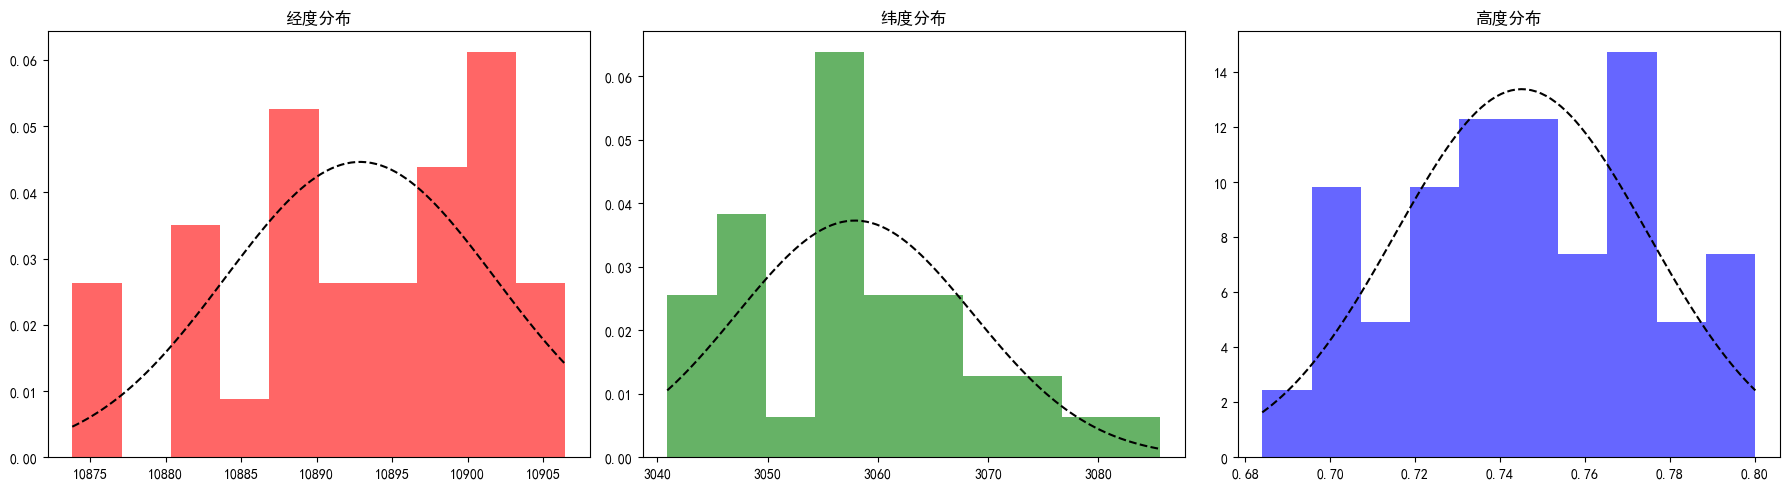

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 经度分布
x1 = np.linspace(min(lon), max(lon), 100)
axes[0].hist(lon, bins=10, density=True, alpha=0.6, color='r')
axes[0].plot(x1, norm.pdf(x1, mean_lon, std_lon), 'k--')
axes[0].set_title("经度分布")

# 纬度分布
x2 = np.linspace(min(lat), max(lat), 100)
axes[1].hist(lat, bins=10, density=True, alpha=0.6, color='g')
axes[1].plot(x2, norm.pdf(x2, mean_lat, std_lat), 'k--')
axes[1].set_title("纬度分布")

# 高度分布
x3 = np.linspace(min(alt), max(alt), 100)
axes[2].hist(alt, bins=10, density=True, alpha=0.6, color='b')
axes[2].plot(x3, norm.pdf(x3, mean_alt, std_alt), 'k--')
axes[2].set_title("高度分布")

plt.tight_layout()
plt.show()
